In [83]:
#Zachary Elsisi Predictive Model

In [84]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay
from sklearn import metrics
# from sklearn.metrics import mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import sklearn.preprocessing as preproc
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler

In [85]:
complaints = pd.read_csv("complaints_25Nov21.csv")

In [86]:
complaints

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,No,418647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,NaN,NaN,JPMORGAN CHASE & CO.,FL,33133,NaN,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,No,1390395
207256,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10312,NaN,NaN,Referral,2012-01-11,Closed without relief,Yes,Yes,12192
207257,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,NaN,NaN,Web,2012-07-18,Closed with explanation,Yes,No,118351
207258,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,900XX,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969


In [87]:
X = complaints[['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via', 'Company response to consumer', 'Timely response?']]

In [88]:
X = pd.get_dummies(X)

In [89]:
le = LabelEncoder()
y = le.fit_transform(complaints['Consumer disputed?'])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [91]:
disputed_proportion_before = sum(y_test) / len(y_test)

In [92]:
print("Proportion of consumers raising a dispute before random undersampling:", disputed_proportion_before)

Proportion of consumers raising a dispute before random undersampling: 0.21586413200810575


In [93]:
undersampler = RandomUnderSampler(random_state=123)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [94]:
disputed_proportion_after = sum(y_train) / len(y_train)

In [95]:
print("Proportion of consumers raising a dispute after random undersampling:", disputed_proportion_after)

Proportion of consumers raising a dispute after random undersampling: 0.5


In [96]:
model_xgb = XGBClassifier(random_state=123)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [97]:
pred = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.53      0.65     32504
           1       0.27      0.63      0.38      8948

    accuracy                           0.55     41452
   macro avg       0.55      0.58      0.51     41452
weighted avg       0.71      0.55      0.59     41452



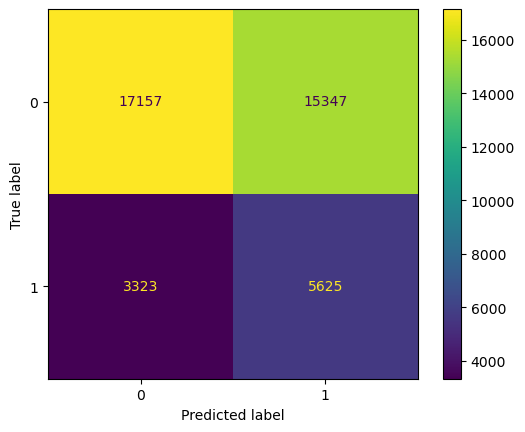

In [98]:
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test,y_test);

In [99]:
def calculate_total_cost_without_model(y_true):
    total_cost = 0
    for true_label in y_true:
        if true_label == 1: 
            total_cost += 600  
        else: 
            total_cost += 100
    return total_cost


base_case_cost_without_model = calculate_total_cost_without_model(y_test)
print("Total cost without a model: $", base_case_cost_without_model)

Total cost without a model: $ 8619200


In [100]:
def calculate_total_cost_with_model(y_true, pred):
    total_cost = 0
    for true_label, pred_label in zip(y_true, pred):
        if pred_label == 1 and true_label == 1:  
            total_cost += 190
        elif pred_label == 1 and true_label == 0:  
            total_cost += 190 
        elif pred_label == 0 and true_label == 0: 
            total_cost += 100  
        else:
            total_cost += 600  
    return total_cost

model_cost_with_model = calculate_total_cost_with_model(y_test, pred)
print("Total cost with the model (default threshold): $", model_cost_with_model)

Total cost with the model (default threshold): $ 7694180


In [50]:
thresholds = [0.54, 0.1, 0.5, 0.46]

In [118]:
threshold1 = .54

              precision    recall  f1-score   support

           0       0.82      0.68      0.75     32504
           1       0.29      0.47      0.35      8948

    accuracy                           0.63     41452
   macro avg       0.55      0.57      0.55     41452
weighted avg       0.71      0.63      0.66     41452



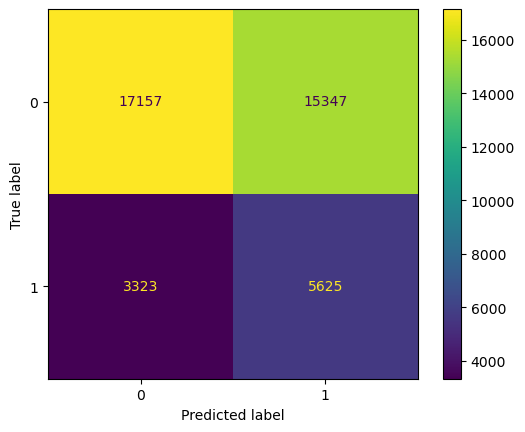

In [131]:
pred_prob =  model_xgb.predict_proba(X_test)
pred_prob = pred_prob[:,1]

pred = (pred_prob>threshold1).astype(int)

print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test,y_test);

In [132]:
def calculate_total_cost_with_model(y_true, pred):
    total_cost = 0
    for true_label, pred_label in zip(y_true, pred):
        if pred_label == 1 and true_label == 1:  
            total_cost += 190
        elif pred_label == 1 and true_label == 0:  
            total_cost += 190 
        elif pred_label == 0 and true_label == 0: 
            total_cost += 100  
        else:
            total_cost += 600  
    return total_cost

model_cost_with_model = calculate_total_cost_with_model(y_test, pred)
print("Total cost with the model (threshold of .54): $", model_cost_with_model)

Total cost with the model (default threshold): $ 7844330


In [133]:
threshold2 = .1

              precision    recall  f1-score   support

           0       0.98      0.00      0.01     32504
           1       0.22      1.00      0.36      8948

    accuracy                           0.22     41452
   macro avg       0.60      0.50      0.18     41452
weighted avg       0.82      0.22      0.08     41452



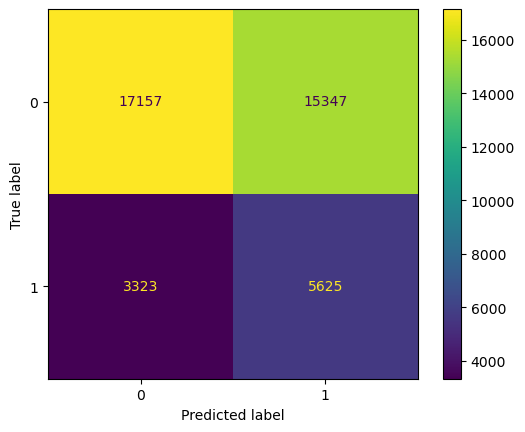

In [134]:
pred_prob =  model_xgb.predict_proba(X_test)
pred_prob = pred_prob[:,1]

pred = (pred_prob>threshold2).astype(int)

print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test,y_test);

In [135]:
def calculate_total_cost_with_model(y_true, pred):
    total_cost = 0
    for true_label, pred_label in zip(y_true, pred):
        if pred_label == 1 and true_label == 1:  
            total_cost += 190
        elif pred_label == 1 and true_label == 0:  
            total_cost += 190 
        elif pred_label == 0 and true_label == 0: 
            total_cost += 100  
        else:
            total_cost += 600  
    return total_cost

model_cost_with_model = calculate_total_cost_with_model(y_test, pred)
print("Total cost with the model (threshold of .1): $", model_cost_with_model)

Total cost with the model (default threshold): $ 7865990


In [136]:
threshold3 = .5

              precision    recall  f1-score   support

           0       0.84      0.53      0.65     32504
           1       0.27      0.63      0.38      8948

    accuracy                           0.55     41452
   macro avg       0.55      0.58      0.51     41452
weighted avg       0.71      0.55      0.59     41452



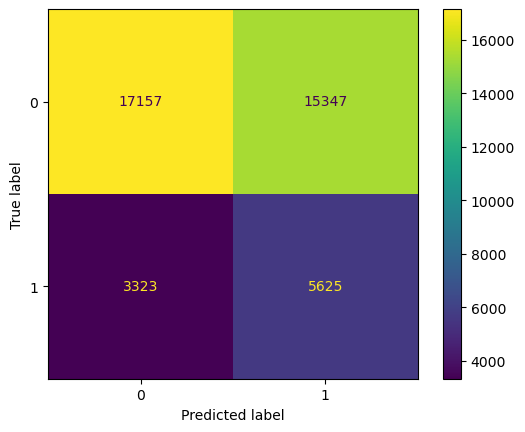

In [137]:
pred_prob =  model_xgb.predict_proba(X_test)
pred_prob = pred_prob[:,1]

pred = (pred_prob>threshold3).astype(int)

print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test,y_test);

In [138]:
def calculate_total_cost_with_model(y_true, pred):
    total_cost = 0
    for true_label, pred_label in zip(y_true, pred):
        if pred_label == 1 and true_label == 1:  
            total_cost += 190
        elif pred_label == 1 and true_label == 0:  
            total_cost += 190 
        elif pred_label == 0 and true_label == 0: 
            total_cost += 100  
        else:
            total_cost += 600  
    return total_cost

model_cost_with_model = calculate_total_cost_with_model(y_test, pred)
print("Total cost with the model (threshold of .5): $", model_cost_with_model)

Total cost with the model (default threshold): $ 7694180


In [139]:
threshold4 = .46

              precision    recall  f1-score   support

           0       0.86      0.35      0.50     32504
           1       0.25      0.79      0.38      8948

    accuracy                           0.44     41452
   macro avg       0.56      0.57      0.44     41452
weighted avg       0.73      0.44      0.47     41452



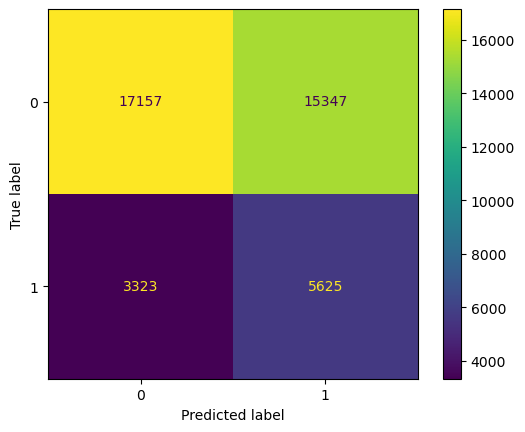

In [140]:
pred_prob =  model_xgb.predict_proba(X_test)
pred_prob = pred_prob[:,1]

pred = (pred_prob>threshold4).astype(int)

print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test,y_test);

In [141]:
def calculate_total_cost_with_model(y_true, pred):
    total_cost = 0
    for true_label, pred_label in zip(y_true, pred):
        if pred_label == 1 and true_label == 1:  
            total_cost += 190
        elif pred_label == 1 and true_label == 0:  
            total_cost += 190 
        elif pred_label == 0 and true_label == 0: 
            total_cost += 100  
        else:
            total_cost += 600  
    return total_cost

model_cost_with_model = calculate_total_cost_with_model(y_test, pred)
print("Total cost with the model (threshold of .46): $", model_cost_with_model)

Total cost with the model (default threshold): $ 7617290
